In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("../../neuron_morphology_tools/")
#!git clone https://github.com/celiibrendan/python_tools
#sys.path.append("....path to/python_tools/python_tools")
sys.path.append("/python_tools/python_tools/")


In [3]:
from pathlib import Path

#neuron_morphology_tools modules
import neuron_nx_utils as nxu
import neuron_nx_feature_processing as nxf

#python_tools package modules
import system_utils as su

# Loading the neuron object

In [4]:
G = su.decompress_pickle("./864691134884771066_0_proofread_G.pbz2")

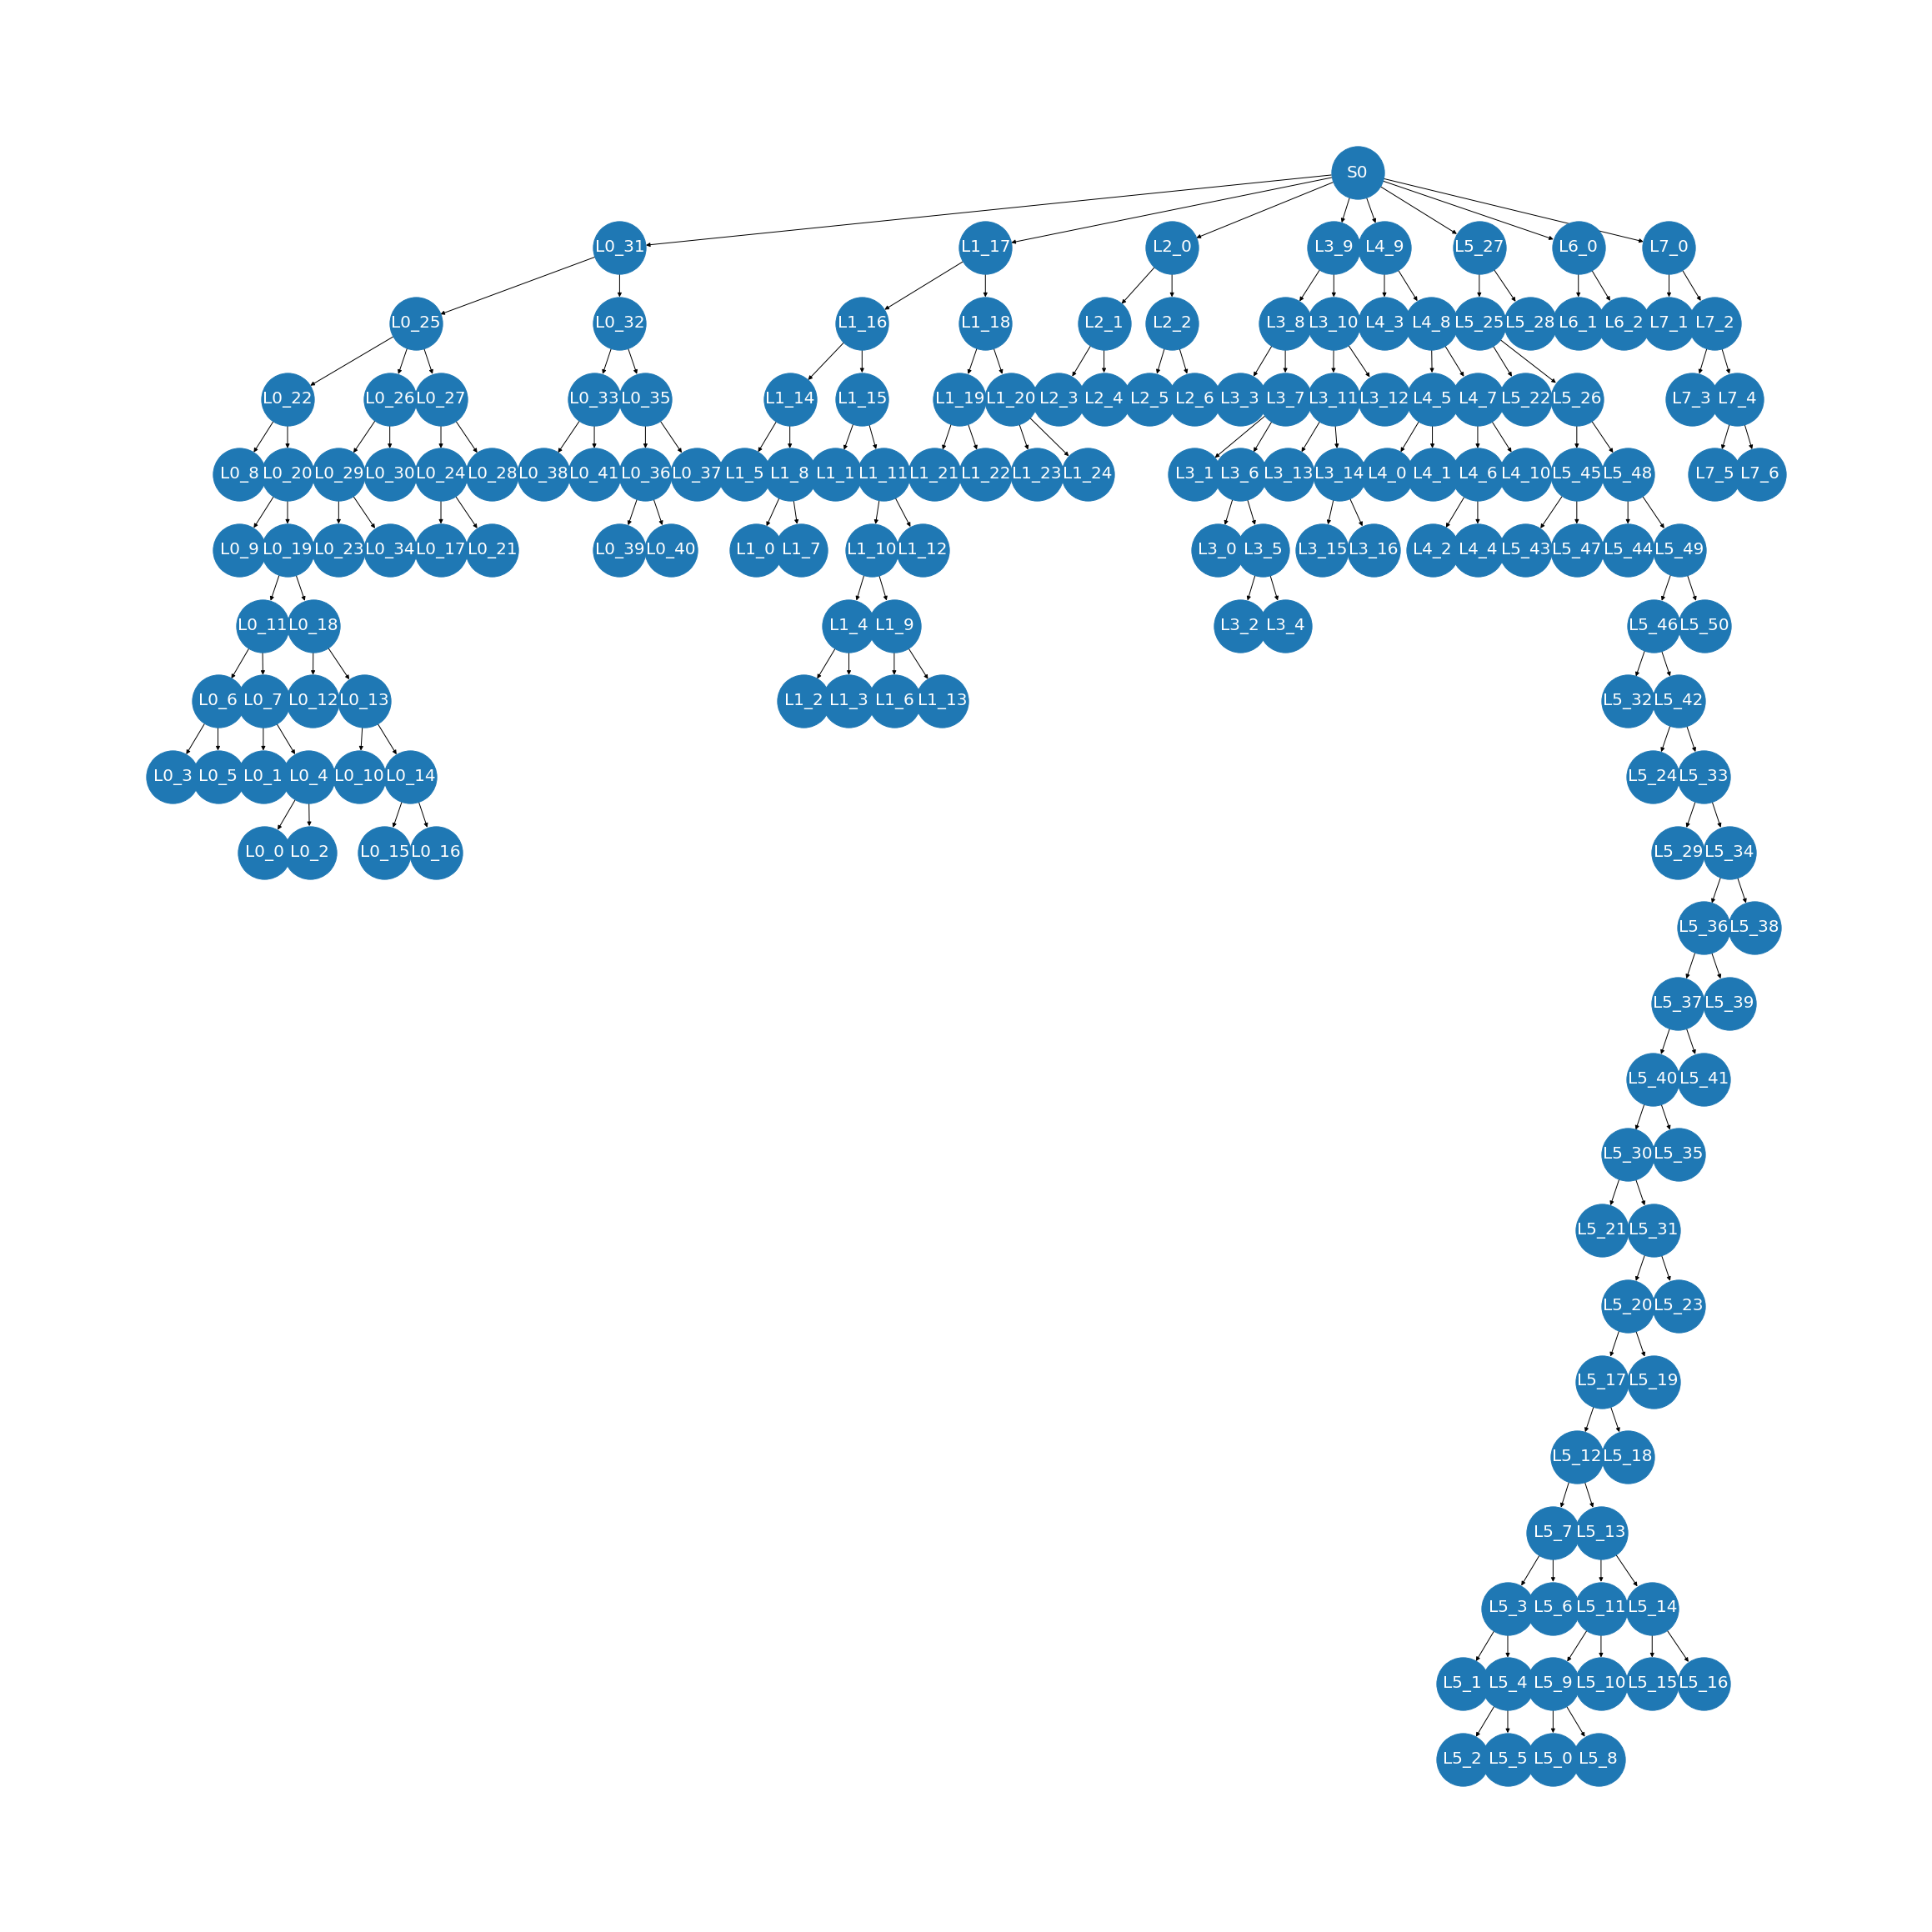

In [5]:
nxu.draw_tree(G)

# Removing small connector nodes directly off the soma

small_nodes = []
small_soma_neighbors= []


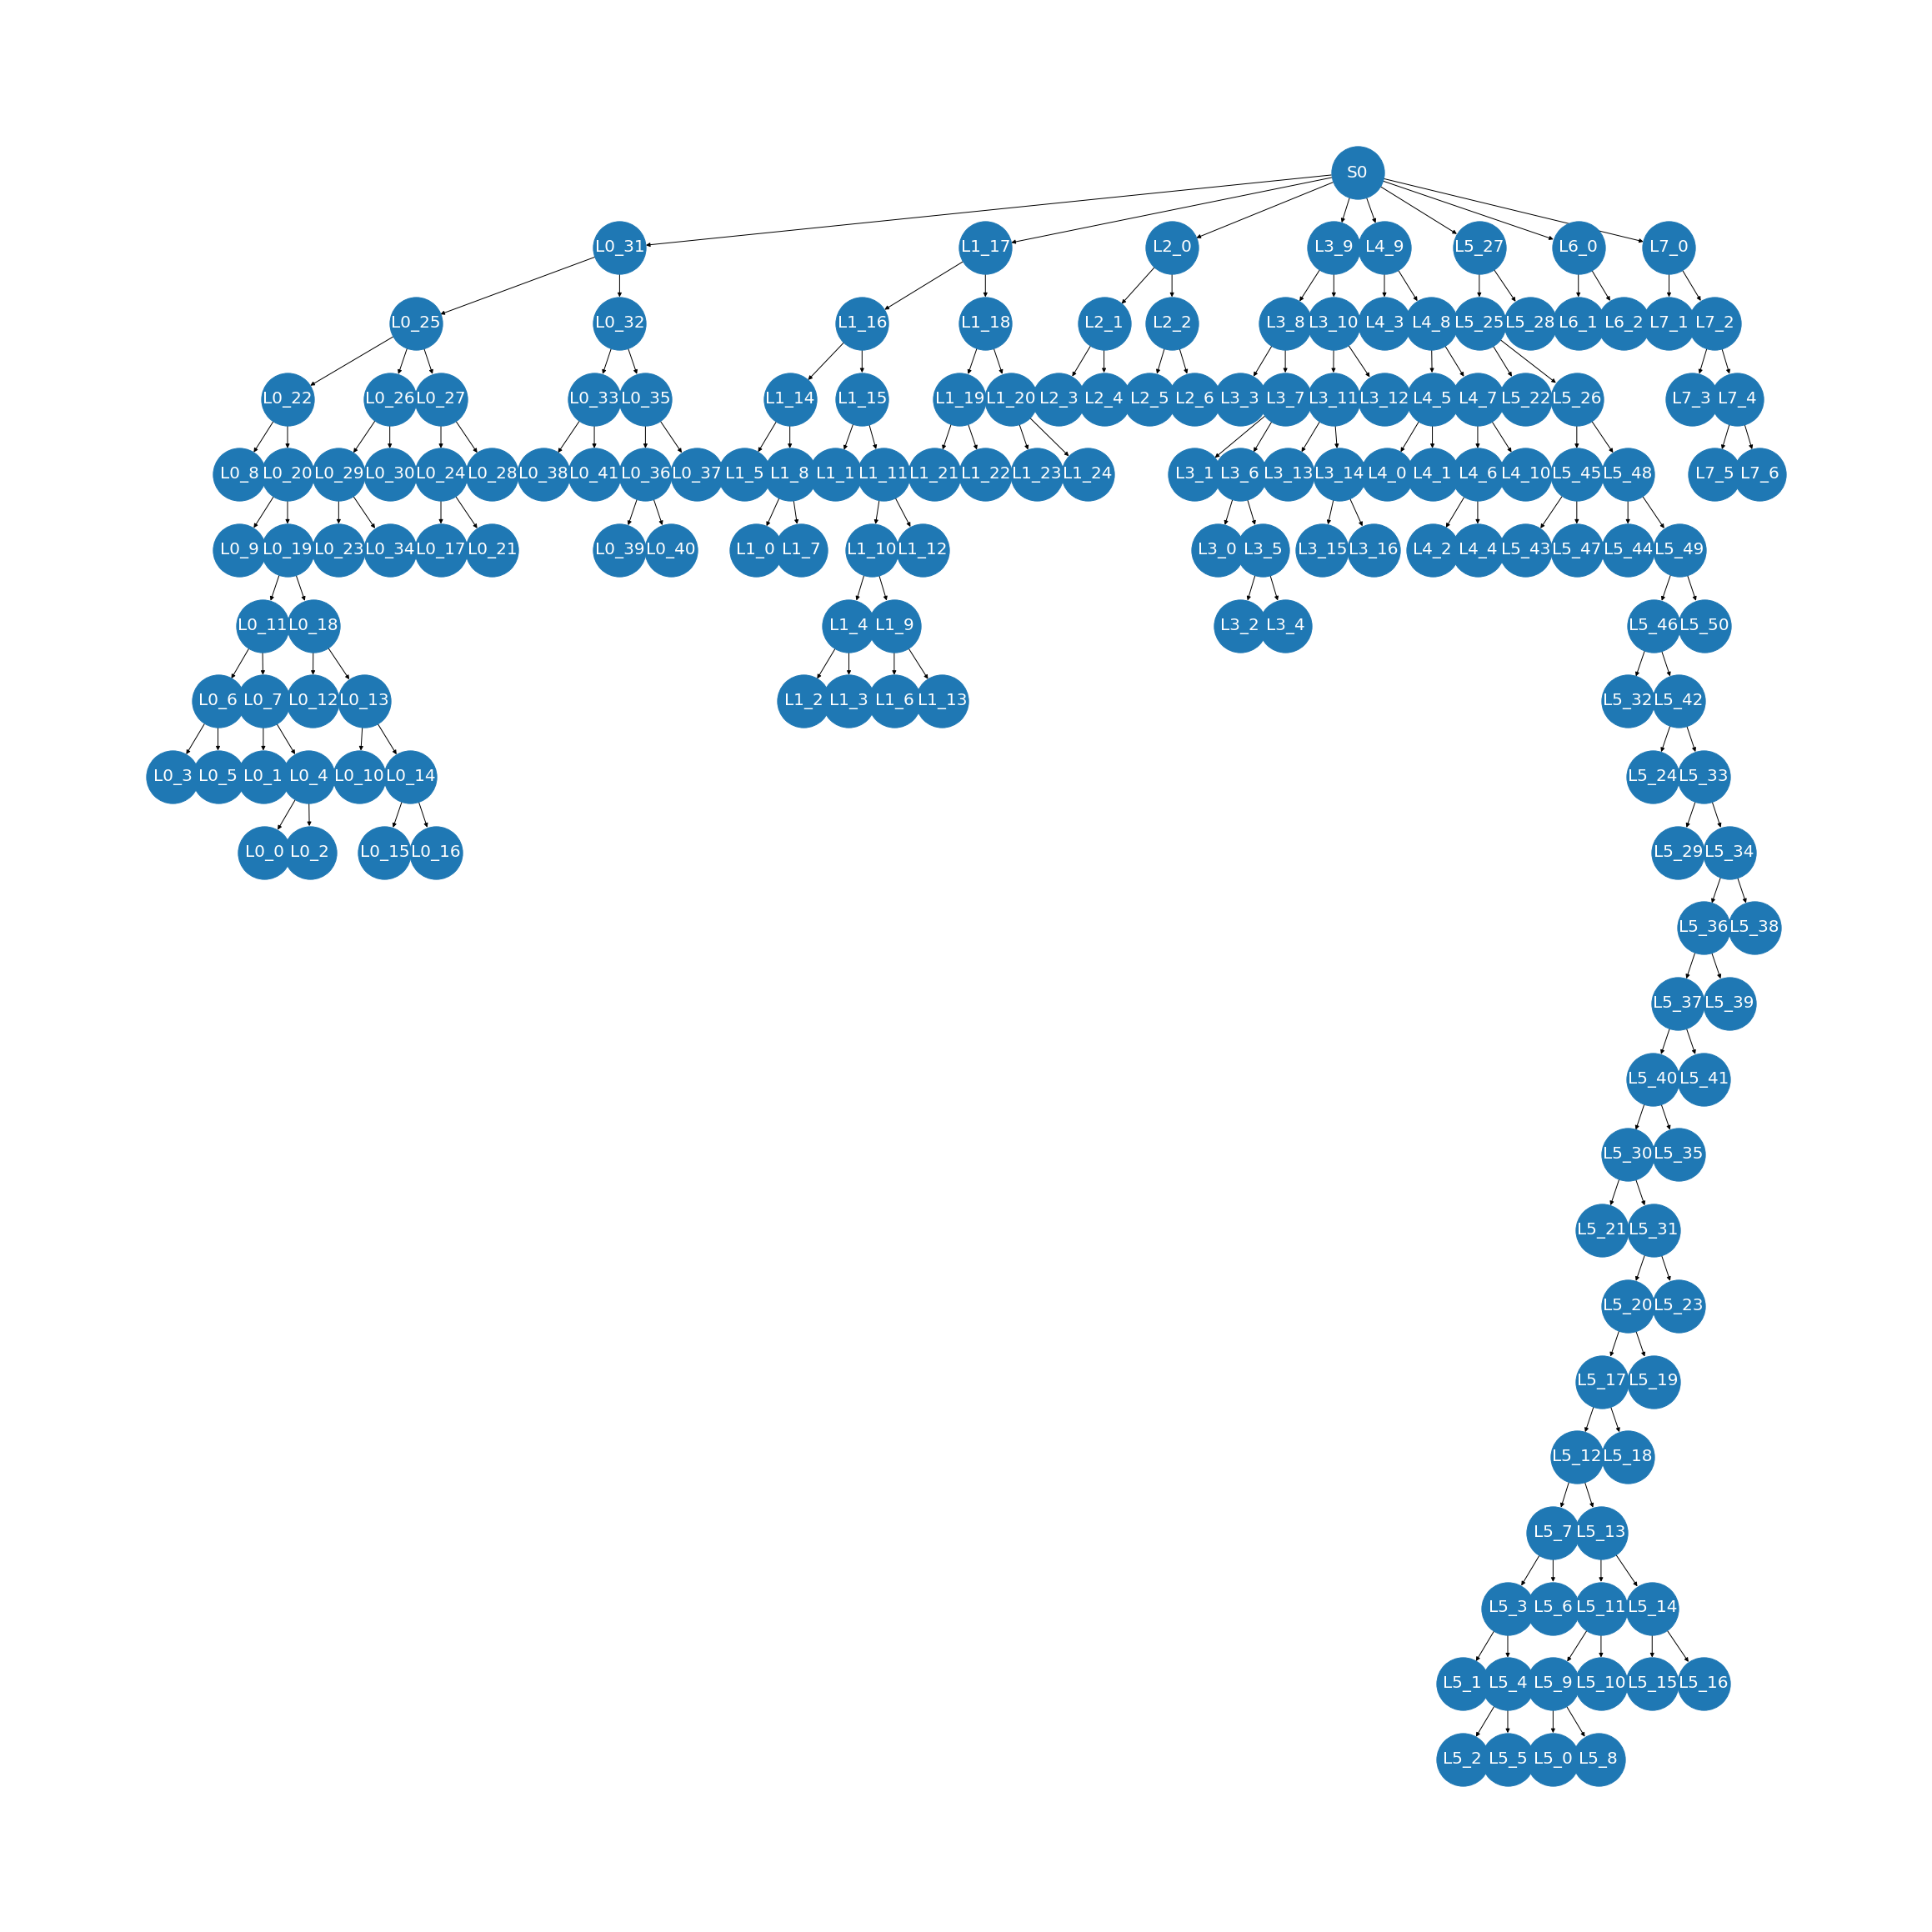

In [6]:
remove_starter_branches = True
verbose = True

if remove_starter_branches:
    G_filt = nxu.remove_small_starter_branches(
            G,
            verbose = verbose,
            maintain_skeleton_connectivity = True)
else:
    G_filt = G

nxu.draw_tree(G_filt)

# Adding and filtering down to certain features

In [7]:
features_to_output = [
    'n_spines',
    'n_synapses_head',
    'n_synapses_neck',
    'n_synapses_post',
    'n_synapses_pre',
    'skeletal_length',
    'total_spine_volume',
    'width_upstream', 
    'width_downstream',
    'skeleton_vector_downstream_phi',
    'skeleton_vector_downstream_theta',
    'skeleton_vector_upstream_phi',
    'skeleton_vector_upstream_theta',
    
    # the skeleton specific features
    'width_no_spine',
    "synapse_data",
    "spine_data",
    "spine_data",
    "skeleton_data"
        ]

G_with_feats = nxf.filter_G_features(
                    G_filt,
                    features=features_to_output,
                    inplace = False,
                    verbose = verbose,
                )

features_not_computed = ['skeleton_vector_downstream_phi' 'skeleton_vector_downstream_theta'
 'skeleton_vector_upstream_phi' 'skeleton_vector_upstream_theta'
 'width_no_spine']


---Setting skeleton_vector_downstream_phi, att_func =<function skeleton_vector_downstream_phi at 0x7fb2c631c840>


---Setting skeleton_vector_downstream_theta, att_func =<function skeleton_vector_downstream_theta at 0x7fb2c631c7b8>


---Setting skeleton_vector_upstream_phi, att_func =<function skeleton_vector_upstream_phi at 0x7fb2c631c950>


---Setting skeleton_vector_upstream_theta, att_func =<function skeleton_vector_upstream_theta at 0x7fb2c631c8c8>


---Setting width_no_spine, att_func =<function width_no_spine at 0x7fb2c631c9d8>
Number of features after adding missing ones = 60
Number of features after adding missing ones = 18


In [8]:
G_with_feats.nodes["L0_0"]

{'n_spines': 15,
 'n_synapses_head': 10,
 'n_synapses_neck': 0,
 'n_synapses_post': 39,
 'n_synapses_pre': 0,
 'skeletal_length': 43365.41692145412,
 'total_spine_volume': 2353668834.538622,
 'width_upstream': 269.8656618327621,
 'width_downstream': 360.0080456831056,
 'spine_data': [{'upstream_dist': 14365.471786980139,
   'volume': 570213243.6234779,
   'area': 3042996.4779137895,
   'spine_id': None},
  {'upstream_dist': 16765.46874718538,
   'volume': 289792010.9866479,
   'area': 2056772.6594177056,
   'spine_id': None},
  {'upstream_dist': 8965.490340878634,
   'volume': 142792475.7800153,
   'area': 1210943.3229706956,
   'spine_id': None},
  {'upstream_dist': 23165.442547625295,
   'volume': 156643098.5666472,
   'area': 1196051.5232809382,
   'spine_id': None},
  {'upstream_dist': 14865.470969416596,
   'volume': 256946755.6085612,
   'area': 1425807.6407922085,
   'spine_id': None},
  {'upstream_dist': 26265.43356042076,
   'volume': 275497313.6067072,
   'area': 1631132.8373

In [9]:
list(dict(G_with_feats.nodes["L0_0"]).keys())

['n_spines',
 'n_synapses_head',
 'n_synapses_neck',
 'n_synapses_post',
 'n_synapses_pre',
 'skeletal_length',
 'total_spine_volume',
 'width_upstream',
 'width_downstream',
 'spine_data',
 'synapse_data',
 'skeleton_data',
 'skeleton_vector_downstream_phi',
 'skeleton_vector_downstream_theta',
 'skeleton_vector_upstream_phi',
 'skeleton_vector_upstream_theta',
 'width_no_spine']

# Inspecting the skeleton

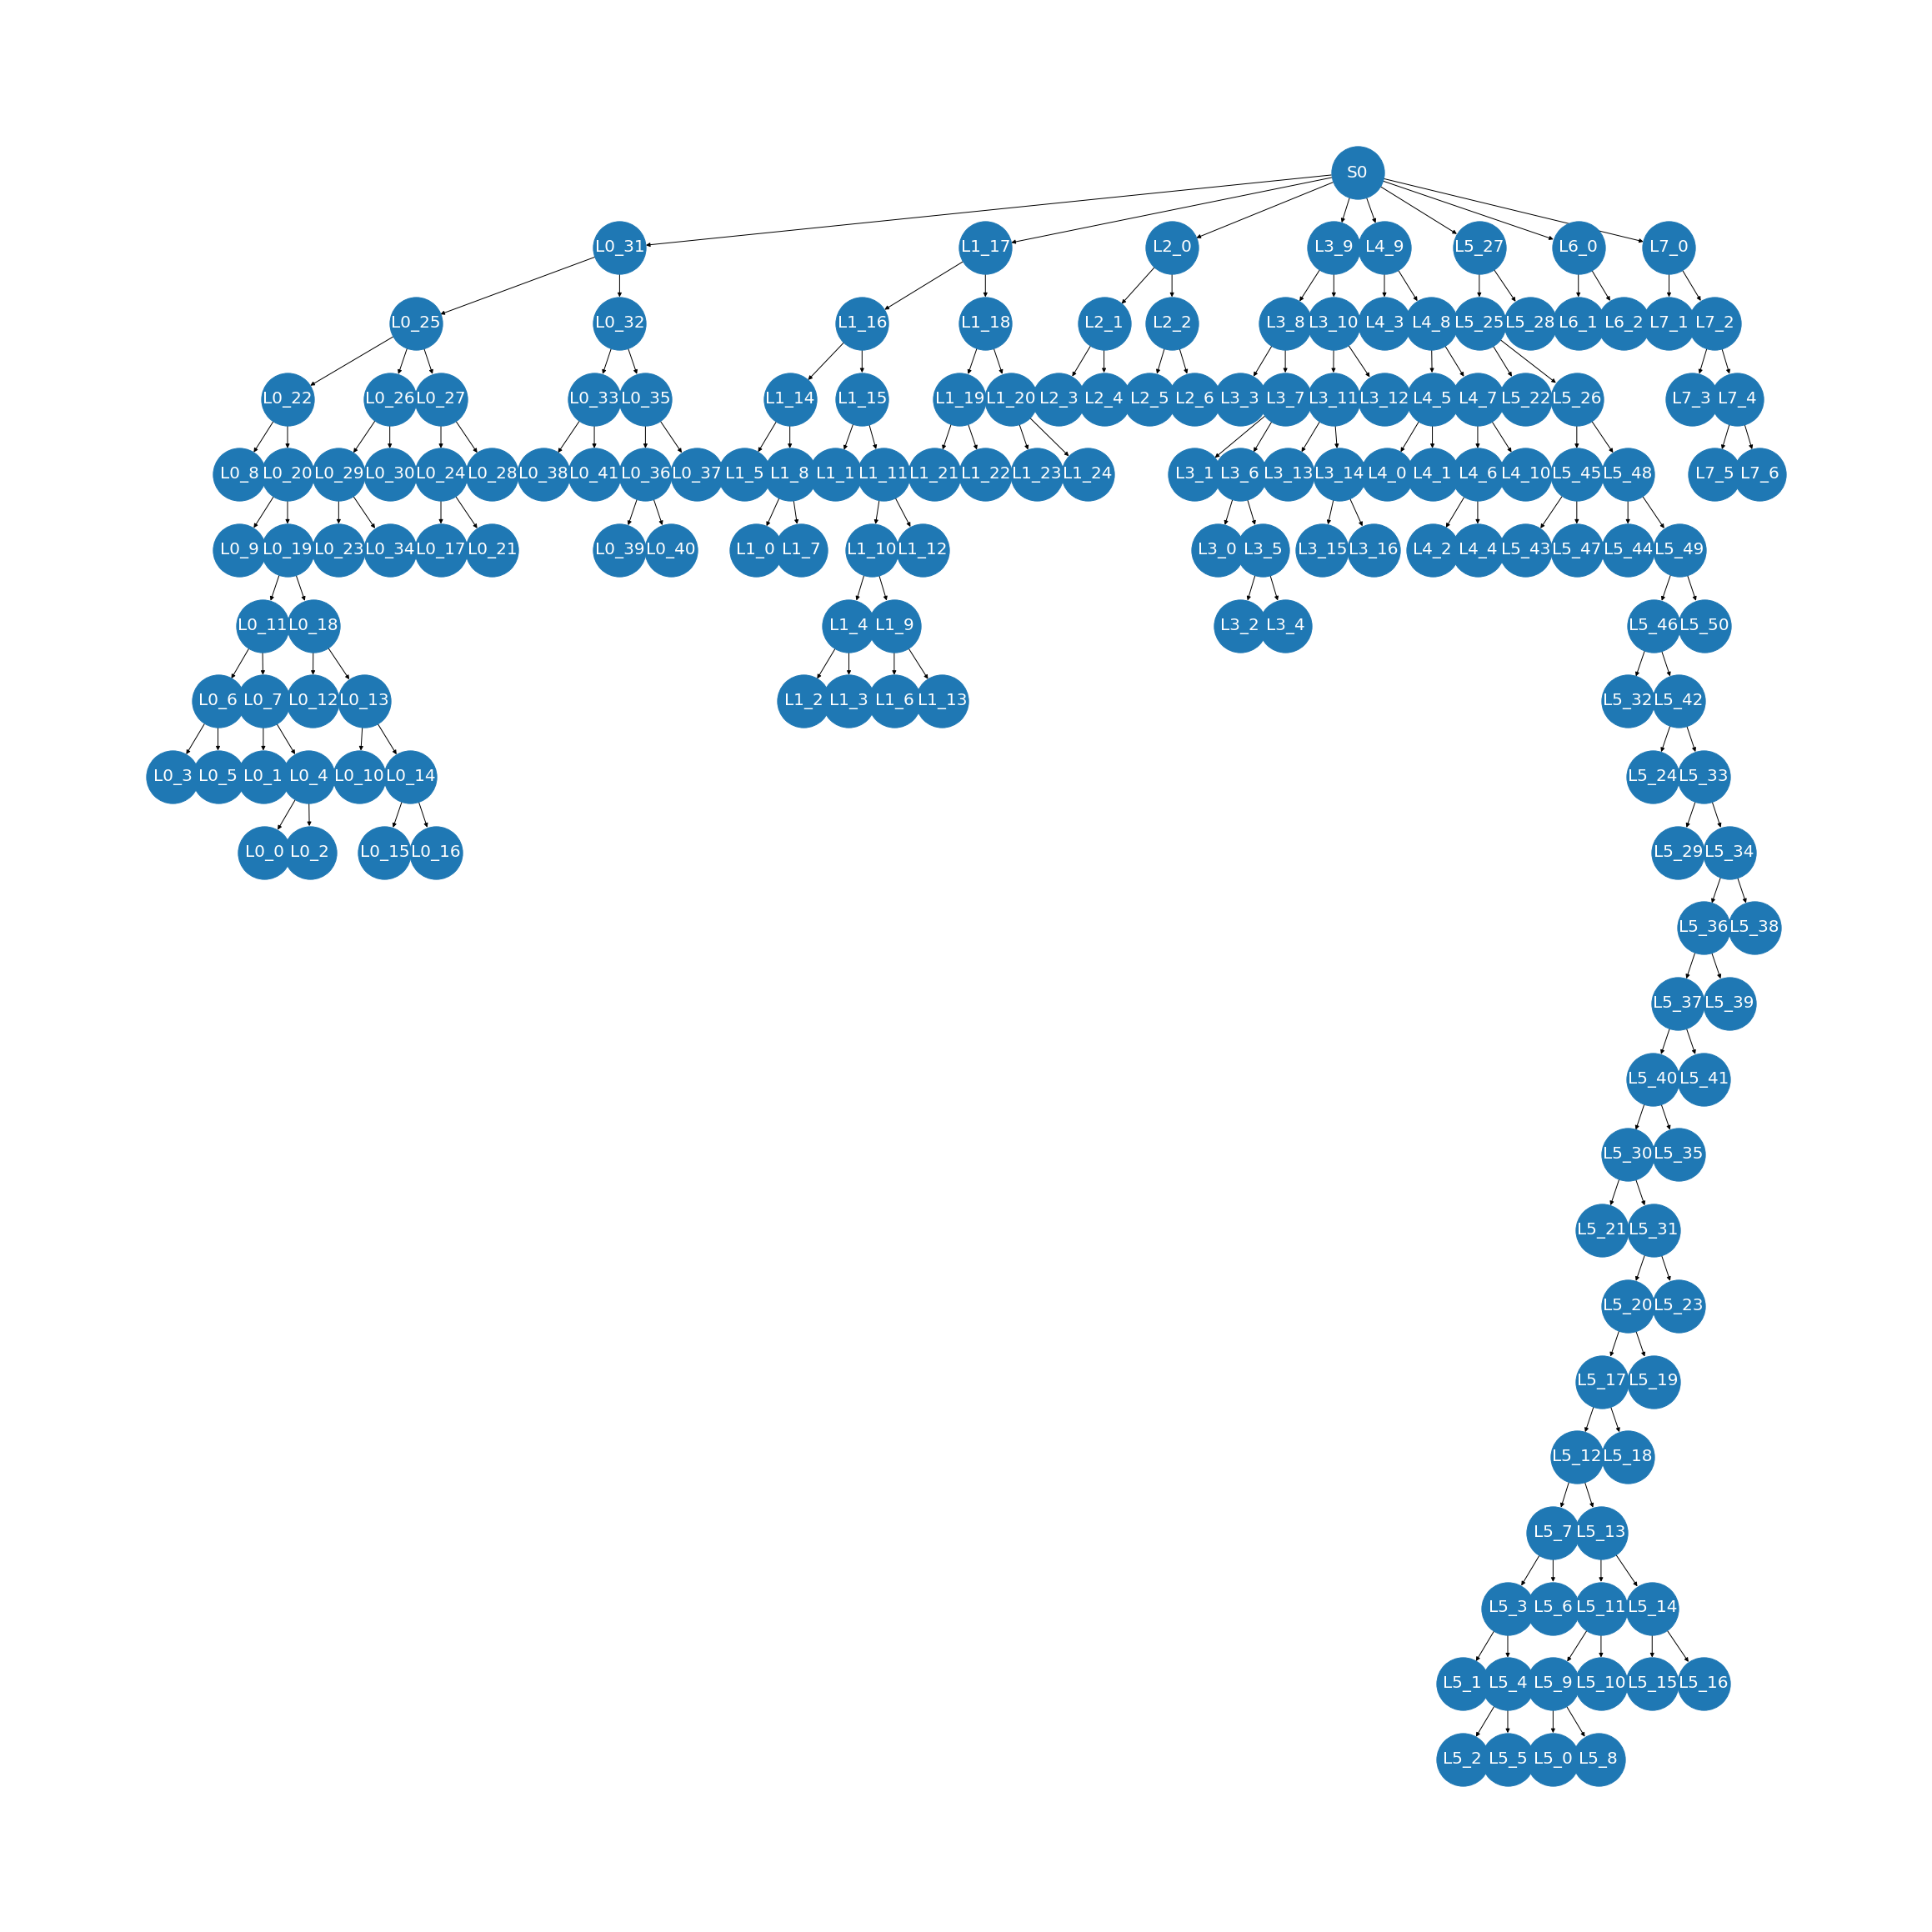

In [10]:
nxu.draw_tree(G_with_feats)

In [14]:
G_with_feats.nodes["L0_31"]["skeleton_data"]

array([[1279580.        ,  427902.        ,  935939.        ],
       [1279157.31303257,  427048.2530242 ,  936033.62695907],
       [1278737.06329417,  426154.31248415,  936172.94791931],
       [1278423.92553451,  425224.35693035,  936354.25212584],
       [1278100.        ,  424297.        ,  936536.        ]])

In [15]:
G_with_feats.nodes["L0_25"]["skeleton_data"]

array([[1278100.        ,  424297.        ,  936536.        ],
       [1277946.44787544,  424164.98069413,  936633.34440221],
       [1277274.03513238,  423560.63161914,  937060.3235602 ],
       [1276598.782562  ,  422930.782562  ,  937441.41828842],
       [1275981.30166709,  422267.55740788,  937847.21440711],
       [1275373.36326985,  421601.57796469,  938269.56162936],
       [1274779.15467057,  420919.64402733,  938685.53192972],
       [1274244.24346869,  420257.48172805,  939209.16348756],
       [1273660.20214955,  419651.20398727,  939747.81438996],
       [1273095.17903887,  419028.2864622 ,  940283.78515335],
       [1272865.        ,  418338.5       ,  940926.5       ]])